In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd


In [ ]:
import os
os.chdir("/content/drive/MyDrive/AINN_Resources/lab/datasets")
!ls

BangaloreHousingPrices.csv  BostonHousePrices.gsheet  linear_regression.png
BostonHousePrices.csv	    golf_dataset.csv


In [ ]:
golf_df = pd.read_csv("golf_dataset.csv")

In [ ]:
golf_df

,Unnamed: 0,Outlook,Temperature,Humidity,Windy,Play
0,0,rainy,hot,high,False,no
1,1,rainy,hot,high,True,no
2,2,overcast,hot,high,False,yes
3,3,sunny,mild,high,False,yes
4,4,sunny,cool,normal,False,yes
5,5,sunny,cool,normal,True,no
6,6,overcast,cool,normal,True,yes
7,7,rainy,mild,high,False,no
8,8,rainy,cool,normal,False,yes
9,9,sunny,mild,normal,False,yes


# Implementation

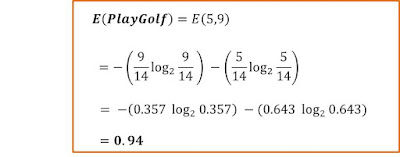

In [ ]:
import math
a=5
b=9
#E(a,b)

entropy = -((a/(a+b))*math.log2(a/(a+b)))-((b/(a+b))*math.log2(b/(a+b)))
print(entropy)


0.9402859586706311


# Import libraries

In [ ]:
## import dependencies
from sklearn import tree #For our Decision Tree
import pydotplus # To create our Decision Tree Graph
from IPython.display import Image  # To Display a image of our graph

# Data Preprocessing

In [ ]:
golf_df.columns

Index(['Unnamed: 0', 'Outlook', 'Temperature', 'Humidity', 'Windy', 'Play'], dtype='object')

In [ ]:
# Convert categorical variable into dummy/indicator variables or (binary vairbles) essentialy 1's and 0's
# I chose the variable name one_hot_data bescause in ML one-hot is a group of bits among which the legal combinations of values are only those with a single high (1) bit and all the others low (0)
one_hot_data = pd.get_dummies(golf_df[ ['Outlook', 'Temperature', 'Humidity', 'Windy'] ])
#print the new dummy data
one_hot_data

,Windy,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal
0,False,False,True,False,False,True,False,True,False
1,True,False,True,False,False,True,False,True,False
2,False,True,False,False,False,True,False,True,False
3,False,False,False,True,False,False,True,True,False
4,False,False,False,True,True,False,False,False,True
5,True,False,False,True,True,False,False,False,True
6,True,True,False,False,True,False,False,False,True
7,False,False,True,False,False,False,True,True,False
8,False,False,True,False,True,False,False,False,True
9,False,False,False,True,False,False,True,False,True


# Define and train the model

In [ ]:
# The decision tree classifier.
model = tree.DecisionTreeClassifier(criterion='gini')
# Training the Decision Tree
model_train = model.fit(one_hot_data, golf_df['Play'])

# Visualize the model

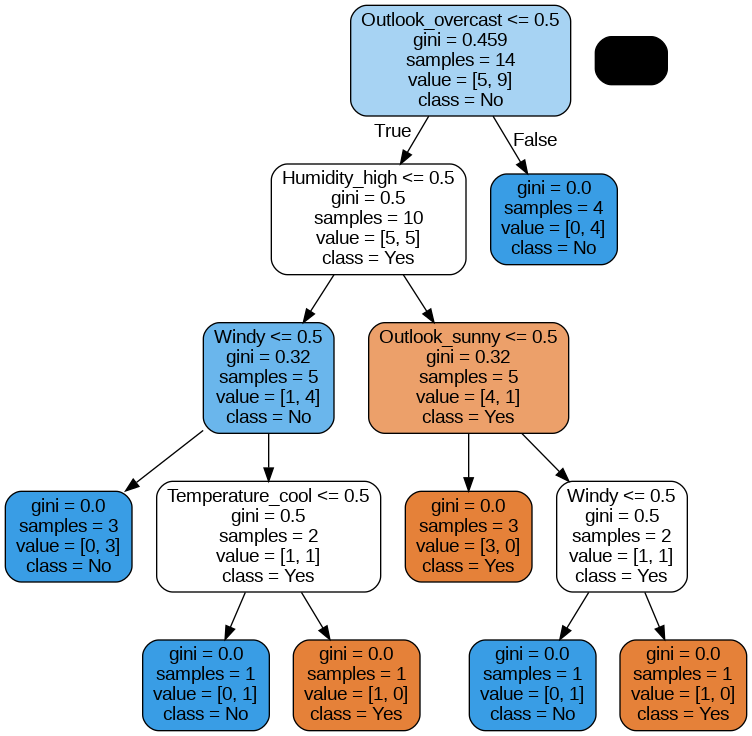

In [ ]:
# Export/Print a decision tree in DOT format.
# print(tree.export_graphviz(model, None))

#Create Dot Data
dot_data = tree.export_graphviz(model_train, out_file=None, feature_names=list(one_hot_data.columns.values),
                                class_names=['Yes', 'No'], rounded=True, filled=True)
#Create Graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

# Make prediciton

In [ ]:
one_hot_data.columns

Index(['Windy', 'Outlook_overcast', 'Outlook_rainy', 'Outlook_sunny',
       'Temperature_cool', 'Temperature_hot', 'Temperature_mild',
       'Humidity_high', 'Humidity_normal'],
      dtype='object')

In [ ]:
prediction = model.predict([[0,0,1,0,1,0,0,1,0]])
prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['no'], dtype=object)

In [ ]:
prediction = model.predict([[0,1,0,0,1,0,0,1,0]])
prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['yes'], dtype=object)